## Antenna Position Measurement

The antennas are laid out on tiles, and these tiles are placed on site. Once this is done, a survey is needed to refine the positions of each antenna in the array.

Three reference posts are placed. The first is at the centre of the array, the second approximately 2.5 meters due north. The first and second post defines the $y$ axis. The third post is placed approximately 2.5 meters east of the centre, and reasonably close to at right angles to the $y$ axis.

The first reference point has coordinates (0,0). The second reference point has coordinates (0, y) and the third is not known, but must be established by measurement.

All measurements are made from the height of the antennas on the reference points.

In [1]:
import numpy as np
from scipy.optimize import minimize 

In [2]:
x0 = [0,0]
x1 = [0, 2209]

### Locating the third reference point

In [3]:
d_0_2 = 2047
d_1_2 = 3020

def dist(a,b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

def f(x):
    return (dist(x0, x) - d_0_2)**2 + (dist(x1, x) - d_1_2)**2

initial_guess = [2047, 0]
res = minimize(f, initial_guess)
x2 = res.x

In [4]:
reference_points = [x1, x0, x2]
reference_points

[[0, 2209], [0, 0], array([ 2046.96807079,   -11.43277996])]

### Finding the antennas

This is done by measuring the distance from each antenna to the three reference points x0, x1 and x2.

In [5]:
n_ant = 24
m = np.zeros((24,3))

In [6]:
m[0,:] = [1563, 855, 2618]
m[1,:] = [1407, 825, 2355]
m[2,:] = [1750, 765, 2644]
m[3,:] = [839, 1373, 2416]
m[4,:] = [1151, 1422, 2986]
m[5,:] = [842, 1410, 2662]
m[6,:] = [2527, 1119, 929]
m[7,:] = [2274, 1200, 915]
m[8,:] = [2715, 1261, 824]
m[9,:] = [1684, 1064, 1457]
m[10,:] = [2238, 546, 1501]
m[11,:] = [1834, 805, 1493]
m[12,:] = [3320, 1111, 2370]
m[13,:] = [3385, 1192, 2131]
m[14,:] = [3446, 1247, 2555]
m[15,:] = [3063, 1048, 1531]
m[16,:] = [2760, 550, 2096]
m[17,:] = [2873, 784, 1689]
m[18,:] = [2342, 934, 2979]
m[19,:] = [2638, 1142, 3179]
m[20,:] = [2186, 993, 3020]
m[21,:] = [3130, 1260, 3140]
m[22,:] = [2545, 565, 2544]
m[23,:] = [2942, 1000, 2891]

In [7]:
#Initial Guesses are from json
import requests
import json

pos_url = "https://tart.elec.ac.nz/dev/api/v1/imaging/antenna_positions"

def get_data(path):
    server = "https://tart.elec.ac.nz/dev"

    r = requests.get('{}/{}'.format(server, path))
    return json.loads(r.text)

def get_pos():
    return np.array(get_data('api/v1/imaging/antenna_positions'))

current_pos = get_pos()
current_pos


array([[-0.29      ,  0.79      ,  0.        ],
       [ 0.03      ,  0.81      ,  0.        ],
       [-0.4       ,  0.64      ,  0.        ],
       [ 0.39      ,  1.31      ,  0.        ],
       [-0.34      ,  1.37      ,  0.        ],
       [ 0.12      ,  1.4       ,  0.        ],
       [ 1.0736767 , -0.32677589,  0.        ],
       [ 1.20206681, -0.03298007,  0.        ],
       [ 1.156861  , -0.49315008,  0.        ],
       [ 0.92174036,  0.51567016,  0.        ],
       [ 0.53489056, -0.10630028,  0.        ],
       [ 0.71833939,  0.31660222,  0.        ],
       [-0.31827997, -1.07906536,  0.        ],
       [-0.02585563, -1.21054923,  0.        ],
       [-0.48552288, -1.160489  ,  0.        ],
       [ 0.5257228 , -0.93602923,  0.        ],
       [-0.09212992, -0.54263628,  0.        ],
       [ 0.32881278, -0.73053849,  0.        ],
       [-0.91153167,  0.25314087,  0.        ],
       [-1.15446773,  0.04389922,  0.        ],
       [-0.91448021,  0.43912825,  0.   

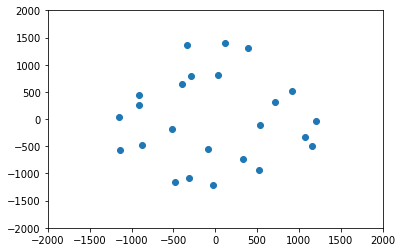

In [8]:
initial_guess = np.zeros(2*n_ant)

for i in range(n_ant):
    initial_guess[2*i:2*i+2] = current_pos[i][0:2]*1000
    #print(current_pos[i][0:2]*1000)
initial_guess

pos_i = current_pos*1000
import matplotlib.pyplot as plt
plt.scatter(pos_i[:,0], pos_i[:,1])
plt.xlim(-2000,2000)
plt.ylim(-2000,2000)
plt.show()

In [9]:
def f(x):
    ret = 0
    for i in range(n_ant):
        for j in range(3):
            p = [x[2*i],x[2*i+1]]
            ret += (dist(reference_points[j], p) - m[i,j])**2
    return ret

print(f(initial_guess))
res = minimize(f, initial_guess)
res

1256725.40456


      fun: 32.160056269275394
 hess_inv: array([[  2.97787007e-01,  -1.59240662e-01,   1.40602240e+00, ...,
         -2.84636486e+00,   3.07446213e-02,  -6.66225518e-03],
       [ -1.59240662e-01,   2.16087925e-01,  -4.01721290e-02, ...,
          1.06423481e-01,   3.33499745e-03,   5.68530785e-02],
       [  1.40602240e+00,  -4.01721290e-02,   8.97807256e+01, ...,
         -1.89780712e+02,   1.99564380e+00,  -1.28794171e+00],
       ..., 
       [ -2.84636486e+00,   1.06423481e-01,  -1.89780712e+02, ...,
          4.01812649e+02,  -4.13871829e+00,   2.64062113e+00],
       [  3.07446213e-02,   3.33499745e-03,   1.99564380e+00, ...,
         -4.13871829e+00,   7.54593635e-01,  -2.71617240e-01],
       [ -6.66225518e-03,   5.68530785e-02,  -1.28794171e+00, ...,
          2.64062113e+00,  -2.71617240e-01,   8.37643364e-01]])
      jac: array([ -6.67572021e-06,  -9.05990601e-06,   1.14440918e-05,
        -3.33786011e-06,   4.76837158e-06,   2.86102295e-06,
        -8.10623169e-06,   1.430

In [10]:
pos = res.x.reshape((24,2))
pos

array([[ -467.10644069,   716.9550079 ],
       [ -159.71634657,   810.30413071],
       [ -538.08115815,   543.77684753],
       [   66.14022101,  1371.98030366],
       [ -654.13109197,  1262.21216309],
       [ -213.47586495,  1394.16821194],
       [ 1118.3358511 ,   -56.97044035],
       [ 1172.17167672,   259.84304158],
       [ 1245.11384938,  -203.38199012],
       [  785.23723618,   718.53157394],
       [  545.70924562,    38.4341815 ],
       [  639.76701489,   489.5362615 ],
       [  -52.94193669, -1110.16183432],
       [  255.23265656, -1165.33723777],
       [ -198.0372302 , -1231.24225038],
       [  715.13335242,  -767.93745775],
       [   21.38590067,  -550.24834484],
       [  473.34891507,  -624.84387323],
       [ -931.61343487,    60.28627532],
       [-1128.0855882 ,  -175.67239288],
       [ -962.0310565 ,   246.06998051],
       [-1004.91356171,  -756.39665194],
       [ -482.86816749,  -290.44618123],
       [ -777.54827979,  -628.49753891]])

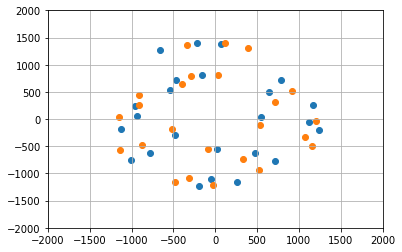

In [11]:
plt.scatter(pos[:,0], pos[:,1])
plt.scatter(pos_i[:,0], pos_i[:,1])

plt.xlim(-2000,2000)
plt.ylim(-2000,2000)
plt.grid(True)
plt.show()

In [21]:
result = np.zeros((n_ant, 3))
result[:,:-1] = np.round(pos/1000.0, 3)
json.dumps(result.tolist())

'[[-0.467, 0.717, 0.0], [-0.16, 0.81, 0.0], [-0.538, 0.544, 0.0], [0.066, 1.372, 0.0], [-0.654, 1.262, 0.0], [-0.213, 1.394, 0.0], [1.118, -0.057, 0.0], [1.172, 0.26, 0.0], [1.245, -0.203, 0.0], [0.785, 0.719, 0.0], [0.546, 0.038, 0.0], [0.64, 0.49, 0.0], [-0.053, -1.11, 0.0], [0.255, -1.165, 0.0], [-0.198, -1.231, 0.0], [0.715, -0.768, 0.0], [0.021, -0.55, 0.0], [0.473, -0.625, 0.0], [-0.932, 0.06, 0.0], [-1.128, -0.176, 0.0], [-0.962, 0.246, 0.0], [-1.005, -0.756, 0.0], [-0.483, -0.29, 0.0], [-0.778, -0.628, 0.0]]'